
SED690

SIT@KMUTT

Apr. 2025

HSV color model manipulation

Color-based segmentation

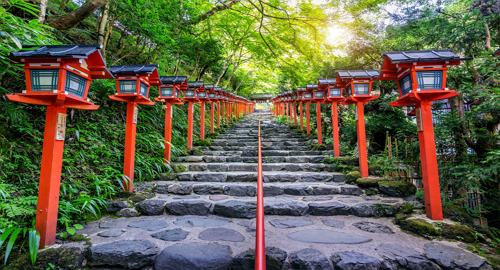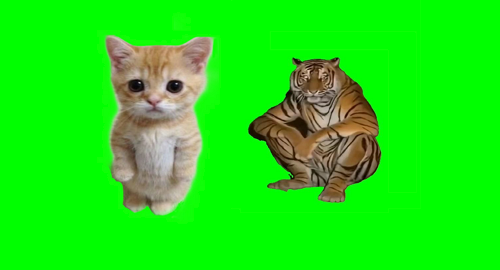

In [27]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

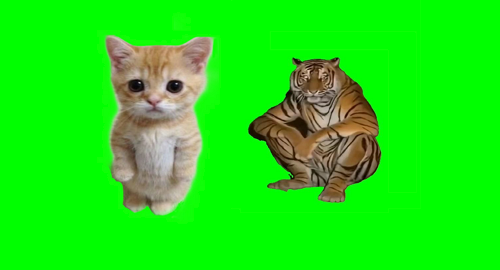

Image Dimension    :  (270, 500, 3)
Image Height       :  270
Image Width        :  500
Number of Channels :  3


In [29]:
# Try to work on HSV, RGB, and BGR formats

# Read in an image with a green screen/background.

# Default read-in image is of BGR format
image_bgr = io.imread("/content/sed690_cat_green_screen.png")

# Need to convert to RGB for a proper display
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)
cv2_imshow(image_rgb)

# get dimensions of the image
dimensions = image_rgb.shape

# height, width, number of channels in image
height = image_rgb.shape[0]
width = image_rgb.shape[1]
channels = image_rgb.shape[2]

print("Image Dimension    : ", dimensions)
print("Image Height       : ", height)
print("Image Width        : ", width)
print("Number of Channels : ", channels)


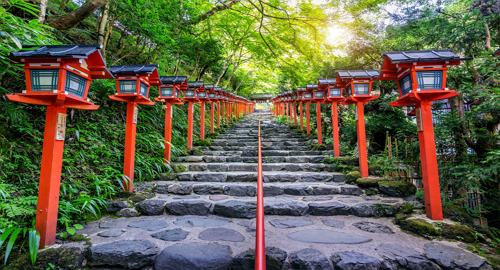

(270, 500, 3)


In [30]:
# Read in a new background image

image_bgr = io.imread("/content/sed690_wallpaper1.png")

# Need to convert to RGB for a proper display
image_bkg = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)
cv2_imshow(image_bkg)

# get dimensions of the image
dimensions = image_rgb.shape
print(dimensions)

In [31]:

# HSV color space is mostly used for object tracking.
# Converstion from BGR to HSV for more proper visual manipulation.

# For HSV, hue range is [0,179], saturation range is [0,255], and value range is [0,255]
hsv = cv.cvtColor(image_rgb, cv.COLOR_BGR2HSV)  # Use BGR2RGB here, note that the input is of type RGB ordered

# Find the HSV value of a given color; use in this order of R,G,B
myColor = np.uint8([[[0,255,0]]]) # (0,255,0) is green
hsv_myColor = cv.cvtColor(myColor,cv.COLOR_RGB2HSV)  # Use RGB2HSV here

# Print the result of [H,S,V]
# The result consists of Hue, Saturation, and Value
print("\nHue, Saturation, value")
print(hsv_myColor)

# So, the hue values of Blue is 120,
# Green is 60, and Red is 0 as can be seen in the color circle below.




Hue, Saturation, value
[[[ 60 255 255]]]


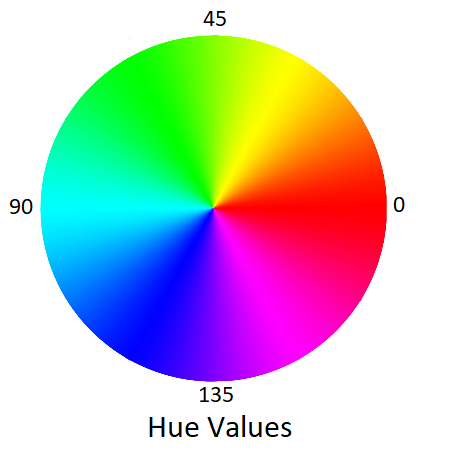

Ref: https://answers.opencv.org/upfiles/15186768416857101.png


In [42]:
# Now use [H-10, 100,100] and [H+10, 255, 255] as the lower bound and upper bound,
# respectively or try to use other close values for covering the given color range.
# Also try to adjust a range of Saturation and/or Value.


# Extract out just the Hue value.
h = hsv_myColor[0][0][0]
print("Hue value is ")
print(h)

# Define range the given color in HSV, as well as the Saturation and Value.
lower_myColor = np.array([h-10,100,100]) #np.array([h-10,100,50])
upper_myColor = np.array([h+10,255,255]) #np.array([h+10,255,235])

print(f'lower_myColor: {lower_myColor}')
print(f'upper_myColor: {upper_myColor}')

Hue value is 
60
lower_myColor: [ 50 100 100]
upper_myColor: [ 70 255 255]


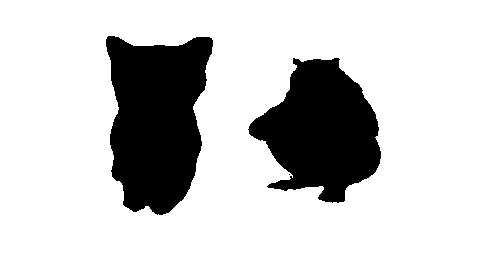

Mask image (270, 500)


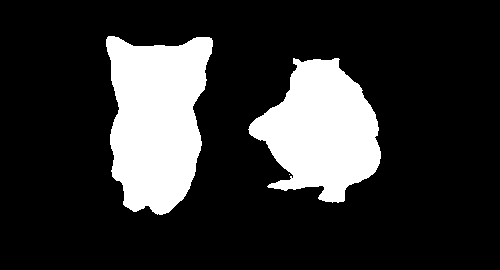

Reversed ask image (270, 500)


In [43]:

# Threshold the HSV image to get only the given color in that range.
# The inRange() function returns a white binary image
# where the colors are detected and 0 otherwise.

mask = cv.inRange(hsv, lower_myColor, upper_myColor)
# reverse the mask, from 0 to 1, and from 1 to 0.
mask_reverse = cv.bitwise_not(mask) # reverse the mask

# display the mask
cv2_imshow(mask)
print("Mask image", mask.shape)
cv2_imshow(mask_reverse)
print("Reversed ask image", mask_reverse.shape)


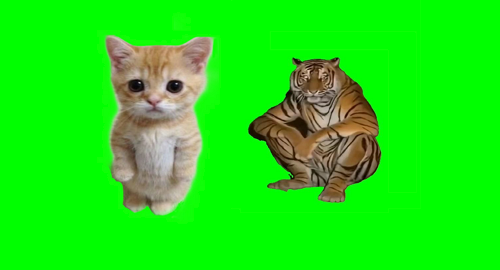

Original (270, 500, 3)


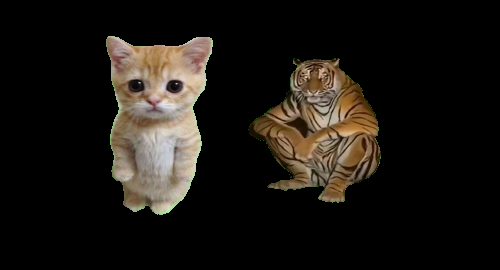

Foreground (270, 500, 3)


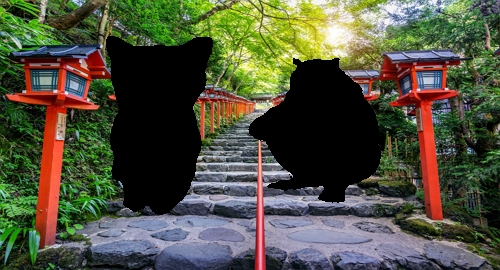

Background (270, 500, 3)


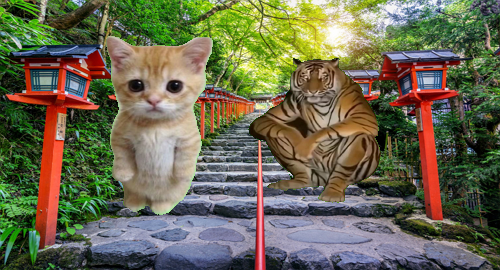

Our final image (270, 500, 3)


In [44]:

# Do bitwise-AND mask and original image
# Syntax: cv2.bitwise_and(source1, source2, mask)
# Note: The mask is optional; source1 could be the same as source2
# Here wherever the mask is 1, the bitwise operation will be done on each source;
# if the mask is 0, no operation will be done.
# THe mask is of the same size of the source image(s) but with just one channel/layer.

image_background = cv.bitwise_and(image_bkg, image_bkg, mask= mask)
image_foreground = cv.bitwise_and(image_rgb, image_rgb, mask= mask_reverse)

# combine the foreground and background images into the final one.
image_result = cv.bitwise_or(image_foreground, image_background, mask= None)

# display images
cv2_imshow(image_rgb)
print("Original", image_rgb.shape)

cv2_imshow(image_foreground)
print("Foreground", image_background.shape)
cv2_imshow(image_background)
print("Background", image_background.shape)

cv2_imshow(image_result)
print("Our final image", image_result.shape)

# Done